# Team F1's Linear Regression model

Team members include Patrick, Carter, Jaegeon and Merlin

In [54]:
#importing all the different libraries that we will need for this part. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Here we pull in the data that will to be used for our predictors and qualifiers.  We can pull from two different csv files, but should be careful that they line up. <br>
The list in the X dataframe should contain all the different columns that we want to use, such as "gap_between_mean" or "circuitType_RACE"

In [79]:
xdata = pd.read_csv(r"C:\Users\merli\Documents\ERDOS\erdos_ds_f1\Merlin preview\gaps and circuit type (no DNF).csv")  #or we can use different files for each, but they should be in the right order

ydata = pd.read_csv(r"C:\Users\merli\Documents\ERDOS\erdos_ds_f1\Patrick\Average Local Positions.csv")

xdata2 = pd.read_csv(r"C:\Users\merli\Documents\ERDOS\erdos_ds_f1\paceRankStartPositionDeltas.csv")

xdata = pd.merge(xdata,xdata2, on = "raceId", how = 'inner')
#"Bgap_mean","Bgap_average" ,"First_ten_gap", "circuitType_STREET"
X  = xdata[ ["Bgap_median", "circuitType_RACE","circuitType_ROAD","absGridDelta"]]



X = X.fillna(1000)  #getting rid of any nan variables, and replaces them with 1000, for only a couple NaNs, shouldn't make a big different. 


Y = ydata[ "average_local_position"]  #this is our target, what we are trying to predict, and will use this to test our predictive model. 


X_train,X_test , Y_train, Y_test = train_test_split(X,Y , test_size= 0.2, random_state= 117)


Here we create the pipeline for how our model will be run.  We are using the Linear Regression model, and we are normalizing our predictor values via StandaScalar.

In [90]:
pipe = Pipeline ([
    ('scalar', StandardScaler() ),  #normalizing our features aka the predictors
    ('model' , LinearRegression() )  # this is the model that we are using, which can be anything we want. 
])

pipe2 = Pipeline ([
    ('scalar', StandardScaler() ),  #normalizing our features aka the predictors
    ('poly', PolynomialFeatures(degree = 3, 
                                  interaction_only= False,
                                  include_bias= False) 
                                  ),
                                    ('reg' , LinearRegression())  # this is the model that we are using, which can be anything we want. 
])


Here is where we train the model, making sure not to use any of our testing data.  That would mean there is data leakage. 

In [91]:

pipe2.fit(X_train,Y_train)  #here we are fitting our model with the testing data,  DO NOT INCLUDE THE TEST PARTITIONS




Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', LinearRegression())])

Now we can use our trained model to make predictions from the testing predictors, and compare them to the actual predictors from the testing set. 

In [92]:

Y_pred = pipe2.predict(X_test) 

mse = mean_squared_error(Y_pred, Y_test)
r2 = r2_score(Y_pred,Y_test)


print(f"Mean squared error: {mse}")
print(f"R^2 value : {r2}")

Mean squared error: 91.75500730367132
R^2 value : -0.0009568144614549023


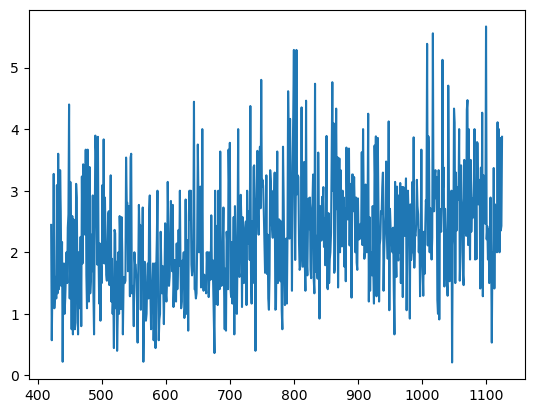

In [93]:
import matplotlib.pyplot as plt

plt.plot(ydata["raceId"],ydata['average_local_position'])

#plt.plot(Y_pred)

In [88]:
print(len(Y_pred))
print(Y_test.to_list())

141
[3.411764705882353, 3.375, 3.263157894736842, 2.3076923076923075, 1.6923076923076923, 1.4, 1.4545454545454546, 3.25, 2.4615384615384617, 1.818181818181818, 1.0, 1.7777777777777777, 2.7058823529411766, 1.7777777777777777, 2.7, 3.4285714285714284, 1.6923076923076923, 1.4, 3.1, 3.25, 0.7272727272727273, 1.5, 2.2857142857142856, 1.75, 1.5555555555555556, 2.75, 1.5, 2.0, 1.875, 3.733333333333333, 1.3333333333333333, 2.0, 4.222222222222222, 3.0526315789473686, 3.142857142857143, 1.25, 2.571428571428572, 1.0, 2.375, 1.0769230769230769, 1.4666666666666666, 1.375, 1.0666666666666669, 2.769230769230769, 1.8, 1.0, 3.473684210526316, 1.5714285714285714, 4.095238095238095, 2.75, 1.375, 1.4285714285714286, 2.0, 1.5555555555555556, 1.8461538461538465, 1.3333333333333333, 2.875, 4.0, 1.2, 1.0588235294117647, 0.9230769230769232, 2.625, 1.6, 1.6, 2.0, 1.4545454545454546, 2.0, 3.090909090909091, 4.333333333333333, 1.2857142857142858, 1.2941176470588236, 1.7142857142857142, 3.8666666666666663, 0.8, 2.

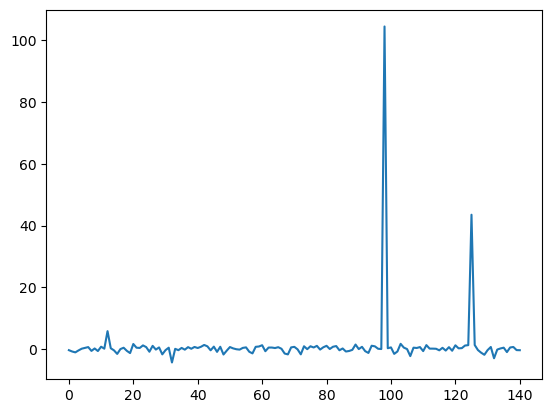

In [94]:
plt.plot((Y_pred- Y_test.to_list()))
